In [5]:
## Set the Pythonpath according to system 
## Work
#PYTHONPATH='/media/Y_DRIVE_BOSWAREMOTE/Aniket/DataScience/thinkStats/code'
# Home
PYTHONPATH='/Users/adeshpande/Projects/DataScience/thinkStats/code'
#$# import all modules here 
import os
import sys
sys.path.append(PYTHONPATH)
os.chdir(PYTHONPATH)
import nsfg
import numpy as np
import thinkplot
import thinkstats2
import matplotlib
%matplotlib inline


/Users/adeshpande/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
df=nsfg.ReadFemPreg()
df.columns

Index([         u'caseid',        u'pregordr',       u'howpreg_n',
             u'howpreg_p',        u'moscurrp',        u'nowprgdk',
              u'pregend1',        u'pregend2',        u'nbrnaliv',
              u'multbrth',
       ...
            u'laborfor_i',      u'religion_i',         u'metro_i',
               u'basewgt', u'adj_mod_basewgt',        u'finalwgt',
                u'secu_p',            u'sest',         u'cmintvw',
           u'totalwgt_lb'],
      dtype='object', length=244)

In [5]:
df.outcome.value_counts(sort=False)

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [6]:
## look up respondant and print outcomes
caseid=10229
preg_map=nsfg.MakePregMap(df)
indices = preg_map[caseid]
df.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

/home/aniket/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


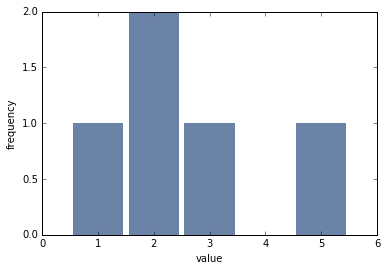

In [7]:
## Chapeter 2
import thinkplot
import thinkstats2
import matplotlib
%matplotlib inline
hist=thinkstats2.Hist([1,2,2,3,5])
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [8]:
## Chapter 3: probability Mass Functions

In [9]:
n = hist.Total()
d = {}
print hist
for x, freq in hist.Items():
    print freq
    d[x]= float(freq)/float(n)

print d

Hist({1: 1, 2: 2, 3: 1, 5: 1})
1
2
1
1
{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}


In [10]:
pmf = thinkstats2.Pmf([1,2,2,3,5])

In [11]:
pmf.Incr(2,0.2)
pmf.Normalize()
pmf.Total()

1.0000000000000002

In [12]:
import chap01soln
resp = chap01soln.ReadFemResp()
pmf = thinkstats2.Pmf(resp.numkdhh)
pmf

Pmf({0: 0.46617820227659301, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.087138558157791451, 4: 0.025644380478869556, 5: 0.010728771424833181})

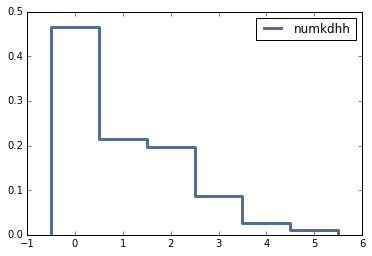

In [13]:
import thinkplot
thinkplot.Pmf(pmf, label='numkdhh')
thinkplot.Show()

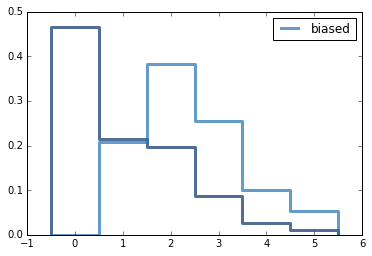

In [14]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

biased = BiasPmf(pmf, label='biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Show()

In [15]:
#chapter 4 CDF 

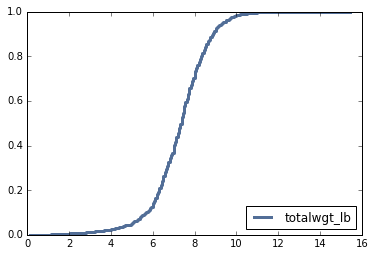

In [16]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
cdf = thinkstats2.Cdf(live.totalwgt_lb)

thinkplot.Cdf(cdf, label='totalwgt_lb')
thinkplot.Show(loc='lower right')

In [2]:
## Chapter 5
import thinkplot
import thinkstats2
import matplotlib


df = ReadBabyBoom

ImportError: No module named thinkplot

In [ ]:
import random
p
sample = [random.gauss(mean, std) for i in range(500)]

In [ ]:
# Chapter 7
import brfss
df = brfss.ReadBrfss(nrows=None)
df[:10]
sample = thinkstats2.SampleRows(df,5000)
heights, weights = sample.htm3, sample.wt

thinkplot.Scatter(heights, weights, alpha=0.2)


In [ ]:
import numpy as np
df = df.dropna(subset=['htm3','wtkg2'])
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3,bins)
groups = df.groupby(indices)

In [ ]:
## Chapter8: Estimation 


In [28]:
import random
import numpy as np
import math

def Estimate(n=7,m=1000):
    mu = 0 
    sigma = 1
    
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

In [33]:
## simulates a population froma sample

def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)

    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(means, mu)
    print ci, stderr

In [34]:
#Estimate(10,10000)
SimulateSample(90, 7.5, 9, 10000 )

(85.866846153746678, 94.086447431959712) 2.49782054979


In [35]:
def Estimate3(n=7, m=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))

In [37]:
## Chapter 9 Hypothesis testing

class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [38]:
## Derived Class Cointest inherits base class Hypo.Test
class CoinTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        heads, tails = data
        test_stat = abs(heads - tails)
        return test_stat

    def RunModel(self):
        heads, tails = self.data
        n = heads + tails
        sample = [random.choice('HT') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['H'], hist['T']
        return data

In [43]:
ct = CoinTest((140,110))
pvalue= ct.PValue()
ct
pvalue


0.065

In [44]:
## Testin difference in means, merge shuffle split data 
import thinkstats2
class DiffMeansPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


In [46]:
import first
import numpy as np
live, firsts, others = first.MakeFrames()
data = firsts.prglngth.values, others.prglngth.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.169

In [24]:
## Testing proportions
class DiceTest(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum(abs(observed - expected))
        return test_stat

    def RunModel(self):
        n = sum(self.data)
        values = [1, 2, 3, 4, 5, 6]
        rolls = np.random.choice(values, n, replace=True)
        hist = thinkstats2.Hist(rolls)
        freqs = hist.Freqs(values)
        return freqs

In [26]:
## Chi squared tests 

class DiceChiTest(DiceTest):

    def TestStatistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum((observed - expected)**2 / expected)
        return test_stat

In [ ]:
class PregLengthTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


In [54]:
## Power

def FalseNegRate(data, num_runs=100):
    group1, group2 = data
    count = 0

    for i in range(num_runs):
        sample1 = thinkstats2.Resample(group1)
        sample2 = thinkstats2.Resample(group2)

        ht = DiffMeansPermute((sample1, sample2))
        pvalue = ht.PValue(iters=101)
        if pvalue > 0.05:
            count += 1

    return count / num_runs

In [61]:
## Power analysis deep dive: 

live, firsts, others = first.MakeFrames()
data = firsts.prglngth.values, others.prglngth.values
## data consists of 2 groups of pregnancy lenght in months for first mothers and others 
sample1= thinkstats2.Resample(data[0])
print data
print sample1


(array([39, 39, 38, ..., 39, 34, 39]), array([39, 39, 39, ..., 39, 39, 39]))
[42 39 39 ..., 39 39 41]


In [62]:
## Could we plot Binomial p-value v/s Coverage for dedtection threshold(ATPp, AF 0.5%)

In [ ]:
## Chapter 10 : Linear Least squares 